In [1]:
import numpy as np 
import pandas as pd 
from astropy.table import Table, Column
import matplotlib.pyplot as plt

In [2]:
def load_table(data_file, mjd_start, mask_date):
    # The code will automatically mask data mask_date days from the input reference date.
    # Change this value in order to adjust the amount of data that's included/excluded
    
    table = Table.read(data_file, format='ascii',names=('MJD','lum','dlum'))
    #print(table)
    # Want to fit versus a magnitude rather than actual luminosity, so convert lum to Mbol
    # Here 83.9605452803 = 2.5*log10(3.839e33) for Solar luminosity
    # 4.74 is bolometric luminosity of the Sun
    table['MJD'] = table['MJD']
    Mbol = -2.5*np.log10(table['lum']) + 83.9605452803 + 4.74
    Mbolerr = 1.086 * (table['dlum'] / table['lum'])

    
    table.add_column(Column(Mbol, name='Mbol'))
    table.add_column(Column(Mbolerr, name='Mbolerr'))
    
    newcol=Column(table['MJD'].data-mjd_start,name='t_exp')
    table.add_column(newcol)
    
    mask = table['t_exp']>mask_date
    table=table[mask]
    print(table)
    return(table)

In [3]:
sn04a = pd.read_csv('2004a_2p.txt', sep = ' ')
sn04a = sn04a.drop(columns = ['Temp./1e3 (K)', 'Temp. Err.', 'Radius/1e15 (cm)', 'Radius Err.'])
sn04a.to_csv('04a_bol_LC.txt', sep = ' ', index= False)
sn04A_bol = load_table('04a_bol_lc.txt', -50, 0)

  MJD    lum    dlum         Mbol            Mbolerr             t_exp       
------- ------ ------ ----------------- ------------------ ------------------
-47.006 41.388   39.3 84.65835917926245 1.0312119454914468 2.9939999999999998
-46.002 41.424 39.345   84.657415197573 1.0314955098493628 3.9979999999999976
-44.997 41.398 39.279  84.6580968797891 1.0304119522682256              5.003
-43.993 41.407 39.288 84.65786086443057 1.0304240345835247  6.006999999999998
-42.989  41.41  39.26 84.65778220404404 1.0296150688239558  7.011000000000003
-41.984 41.414 39.233 84.65767733239278 1.0288076012942482  8.015999999999998
 -40.98 41.418 39.206 84.65757247087012 1.0280002897291034  9.020000000000003
-39.975 41.424 39.179   84.657415197573 1.0271435399768252 10.024999999999999
-38.971 41.429 39.155 84.65728415389249 1.0263904511332642 11.029000000000003
-37.967 41.425 39.181 84.65738898757155 1.0271711768255885 12.033000000000001
    ...    ...    ...               ...                ...      

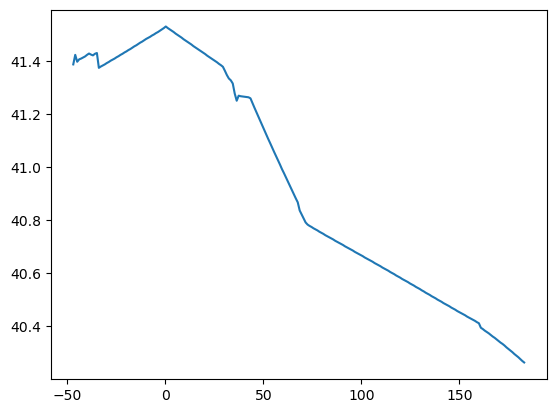

In [4]:
plt.plot(sn04A_bol['MJD'], sn04A_bol['lum'])

In [6]:
sn04a_peak_L = np.max(sn04A_bol['lum'])
np.argmax(sn04a_peak_L)
print(f'peak L: {sn04a_peak_L}')
print(np.argmax(sn04A_bol['lum']))

print(sn04A_bol[47])

peak L: 41.531
47
 MJD   lum    dlum         Mbol            Mbolerr       t_exp 
----- ------ ------ ----------------- ------------------ ------
0.199 41.531 39.452 84.65461430942071 1.0316359346030677 50.199
